# Stage 1

In [1]:
#import block
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split

In [2]:
#this turns a set of 3-character strings into a single one-hot encoded array
def transformVector(d):
    l = len(charlist)
    d = eval(d)
    v = np.zeros(l**3).astype('uint64')
    for string in d:
        num = charlist.index(string[0])*l*l + charlist.index(string[1])*l + charlist.index(string[2])
        v[num] = 1
    return v

In [3]:
df = pd.read_csv("/kaggle/input/vectorfile-version-2/vectorfilev2.csv") #this uploads the training data into a pandas dataframe

In [4]:
#this creates a column containing 2 if the initial code is unpacked, a 1 if it was packed using algorithm 2, and a 0 if it was packed using algorithm 1
for row in df.index:
    try:
        if str(df['name'][row]).split('/')[3] == 'algo1':
            df.loc[row, 'algorithm'] = 0
        elif str(df['name'][row]).split('/')[3] == 'algo2':
            df.loc[row, 'algorithm'] = 1
    except:
        df.loc[row, 'algorithm'] = 2 #this is unpacked
df.head()

,name,vector,algorithm
0,initdirectory/script1.py,"{'##n', 'ucc', '*wi', '#*t', 'n##', 'tes', 'ut...",2.0
1,initdirectory/script2.py,"{'##n', 'ut#', '#in', '*wh', 's*#', 'ill', 'op...",2.0
2,initdirectory/script3.py,"{'##n', 'n##', 'ut#', 'tim', 'gge', 'g*s', 'ul...",2.0
3,initdirectory/script4.py,"{'vis', '##n', 'snu', 'nd*', 'yes', 'quo', 'n#...",2.0
4,initdirectory/script5.py,"{'its', 'k#u', 'per', 'n#d', 'nis', 'eco', 'tr...",2.0


In [5]:
#this transforms the set into a one-hot encoded array
charlist = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '#', '*']
df['enumerated'] = df['vector'].apply(transformVector)

The next two code blocks make sure that the dataframe looks the way we want it to.

In [6]:
print(np.size(df.loc[1, 'enumerated']))
df.head()

54872


,name,vector,algorithm,enumerated
0,initdirectory/script1.py,"{'##n', 'ucc', '*wi', '#*t', 'n##', 'tes', 'ut...",2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,initdirectory/script2.py,"{'##n', 'ut#', '#in', '*wh', 's*#', 'ill', 'op...",2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,initdirectory/script3.py,"{'##n', 'n##', 'ut#', 'tim', 'gge', 'g*s', 'ul...",2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,initdirectory/script4.py,"{'vis', '##n', 'snu', 'nd*', 'yes', 'quo', 'n#...",2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,initdirectory/script5.py,"{'its', 'k#u', 'per', 'n#d', 'nis', 'eco', 'tr...",2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
print(type(df.loc[1, 'enumerated']))
df.tail()

<class 'numpy.ndarray'>


,name,vector,algorithm,enumerated
215,initdirectory/outfile/script10/algo2/script10a...,"{'**j', '595', '840', 'ey*', '47#', '14#', '53...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
216,initdirectory/outfile/script10/algo2/script10a...,"{'**j', '856', '*91', '840', 'ey*', '896', '*8...",1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
217,initdirectory/outfile/script10/algo2/script10a...,"{'**j', '*91', 'ey*', '14#', '47#', '468', '63...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
218,initdirectory/outfile/script10/algo2/script10a...,"{'**j', '*12', '840', 'ey*', '820', '103', '*8...",1.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
219,initdirectory/outfile/script10/algo2/script10a...,"{'045', '*91', '42#', 'c#d', '125', '13#', '74...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Stage 2

In [8]:
#more importing
from tensorflow import keras
from tensorflow.keras import layers
print(df.columns)

Index(['name', 'vector', 'algorithm', 'enumerated'], dtype='object')


In [9]:
#this puts the data into formats that will work for keras.
X = np.array(df['enumerated'].to_numpy().tolist())
y = df['algorithm']
#defining the testing and training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [10]:
#check on the training and testing splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(132, 54872)
(88, 54872)
(132,)
(88,)


In [11]:
y_test

152    1.0
74     1.0
71     1.0
161    0.0
162    0.0
      ... 
104    0.0
189    0.0
108    0.0
86     0.0
109    0.0
Name: algorithm, Length: 88, dtype: float64

In [12]:
model = keras.Sequential([
    #these layers are big but that's necessary because of the size of the input shape
    #input layer
    layers.Dense(8192, input_shape = [54872], activation = 'relu'),
    #hidden layers
    layers.Dense(8192, activation = 'relu'),
    layers.Dense(8192, activation = 'relu'),
    layers.Dense(8192, activation = 'relu'),
    #output layer
    layers.Dense(units = 1)
])

In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
)

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 50,
    epochs = 20
)

Epoch 1/20
3/3 [==============================] - 30s 9s/step - loss: 34.0455 - val_loss: 0.9624
Epoch 2/20
3/3 [==============================] - 26s 9s/step - loss: 1.3725 - val_loss: 1.6699
Epoch 3/20
3/3 [==============================] - 26s 9s/step - loss: 1.1526 - val_loss: 1.0727
Epoch 4/20
3/3 [==============================] - 25s 9s/step - loss: 0.8005 - val_loss: 0.3890
Epoch 5/20
3/3 [==============================] - 25s 9s/step - loss: 0.2567 - val_loss: 0.3479
Epoch 6/20
3/3 [==============================] - 26s 9s/step - loss: 0.3009 - val_loss: 0.3568
Epoch 7/20
3/3 [==============================] - 26s 9s/step - loss: 0.2918 - val_loss: 0.2579
Epoch 8/20
3/3 [==============================] - 26s 9s/step - loss: 0.2310 - val_loss: 0.2402
Epoch 9/20
3/3 [==============================] - 25s 9s/step - loss: 0.1630 - val_loss: 0.3122
Epoch 10/20
3/3 [==============================] - 26s 9s/step - loss: 0.2406 - val_loss: 0.1683
Epoch 11/20
3/3 [=====================

In [15]:
def accuracyof1(prediction, actual):
    prediction = round(prediction.item())
    if prediction < 0:
        prediction = 0
    if prediction > 2:
        prediction = 2
    return (prediction == actual)
y_test = y_test.reset_index(drop=True)

In [16]:
X_test[0]
y_test[0]

1.0

In [17]:
accuracy = 0
count = 0
for i in range(88):
    prediction = model.predict(X_test[i].reshape(1, -1))
    if accuracyof1(prediction, y_test[i]):
        accuracy += 1
    count += 1
accuracy = (accuracy/count)*100

1/1 [==============================] - 0s 266ms/step


In [18]:
print(accuracy)

93.18181818181817


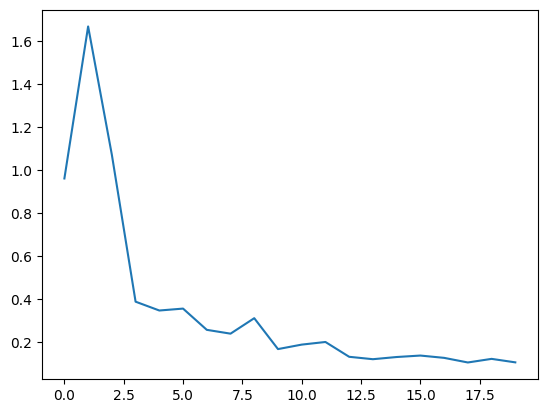

In [19]:
history_df = pd.DataFrame(history.history)
history_df['val_loss'].plot();

# Evaluation
We have achieved 92% accuracy on the test files, which is pretty good!

In [20]:
#these functions are to handle the user-inputted file
def reformPrediction(prediction):
    if prediction < 0.5:
        return "Algorithm 1"
    elif prediction < 1.5:
        return "Algorithm 2"
    else:
        return "Unpacked"
def fileDeal(file): #converts a file to just lowercase letters and changes all non-alpha characters to # (spaces are *)
    nfile = ""
    for char in file:
        if char.isalpha():
            nfile += char.lower()
        elif char.isnumeric():
            nfile += char
        elif char == " ":
            nfile += "*"
        else:
            nfile += "#"
    return nfile
def makeVector(file):
    newfile = fileDeal(file)
    featureSet = set(())
    i = 0
    while i < (len(newfile)-2):
        featureSet.add(newfile[i:i+3])
        i+=1
    return featureSet

## Try it for yourself:

In [21]:
file = 'for i in j: do something' #this is here so that kaggle can save the notebook without getting an error
#predict the state of a file
#fill out the next line with the path to your file and uncomment the next line
#file = open('path_to_file', r)
file = fileDeal(file)
v = str(makeVector(file))
v = np.array(transformVector(v))
v = v.reshape(1, -1)
reformPrediction(model.predict(v)) #this outputs Unpacked, Algorithm 1, or Algorithm 2, depending on what the model predicts

1/1 [==============================] - 0s 265ms/step


'Algorithm 1'